# Outliers

Outliers or influential points can disproportionately impact the regression model. It's recommended to identify and address these points before applying the model. Tools such as leverage plots, **Cook's distance**, and residual plots can help identify these points. Cook's distance is important because it takes into account the leverage of a data point (how much that point influences the model). 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
data = {
    'experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
    'salary': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 200]
}
df = pd.DataFrame(data)

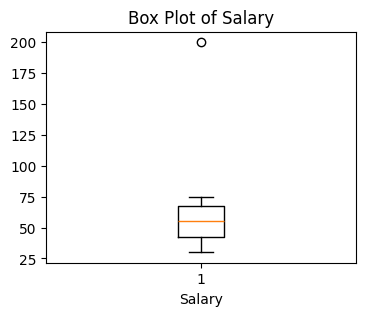

In [9]:
# Plotting the box plot for the salary data
plt.figure(figsize=(4, 3))
plt.boxplot(df['salary'])
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

In [ ]:
# Fit a linear regression model
X = sm.add_constant(df['experience'])  # Add intercept
model = sm.OLS(df['salary'], X).fit()

In [5]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Add Cook's distance to the dataframe
df['cooks_d'] = cooks_d

# Display Cook's distance
print(df[['experience', 'salary', 'cooks_d']])

    experience  salary    cooks_d
0            1      30   0.204855
1            2      35   0.084672
2            3      40   0.027969
3            4      45   0.005114
4            5      50   0.000023
5            6      55   0.004944
6            7      60   0.017969
7            8      65   0.042162
8            9      70   0.085924
9           10      75   0.164640
10          20     200  11.918182


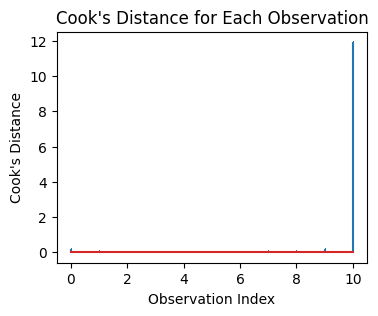

In [10]:
# Plot Cook's distance
plt.figure(figsize=(4,3))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.show()

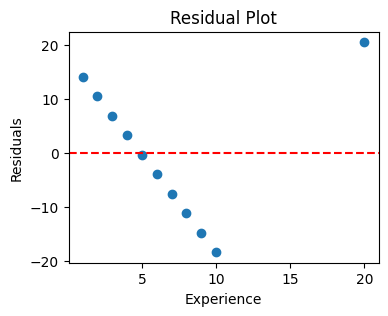

In [12]:
# Residual plot
predictions = model.predict(X)
residuals = df['salary'] - predictions

plt.figure(figsize=(4, 3))
plt.scatter(df['experience'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Experience')
plt.ylabel('Residuals')
plt.show()